EfficientNetB0

✅ Loaded 320 images
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 4, 4,      │  4,049,571 │ input_layer[0][0] │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1280)      │      5,120 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1280)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1286)      │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    164,736 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,227,748 (16.13 MB)

 Trainable params: 175,617 (686.00 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 1.3272 - mse: 1.3272
Epoch 1: val_loss improved from inf to 0.60646, saving model to /content/best_efficientnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 300ms/step - loss: 1.3257 - mse: 1.3257 - val_loss: 0.6065 - val_mse: 0.6065 - learning_rate: 1.0000e-04
Epoch 2/100
111/113 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9231 - mse: 0.9231
Epoch 2: val_loss improved from 0.60646 to 0.49448, saving model to /content/best_efficientnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.9204 - mse: 0.9204 - val_loss: 0.4945 - val_mse: 0.4945 - learning_rate: 1.0000e-04
Epoch 3/100
110/113 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7731 - mse: 0.7731
Epoch 3: val_loss improved from 0.49448 to 0.41531, saving model to /content/best_efficientnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.7704 - mse: 0.7704 - val_loss: 0.4153 - val_mse: 0.4153 - learning_rate: 1.0000e-04
Epoch 4/100
113/113 ━━━

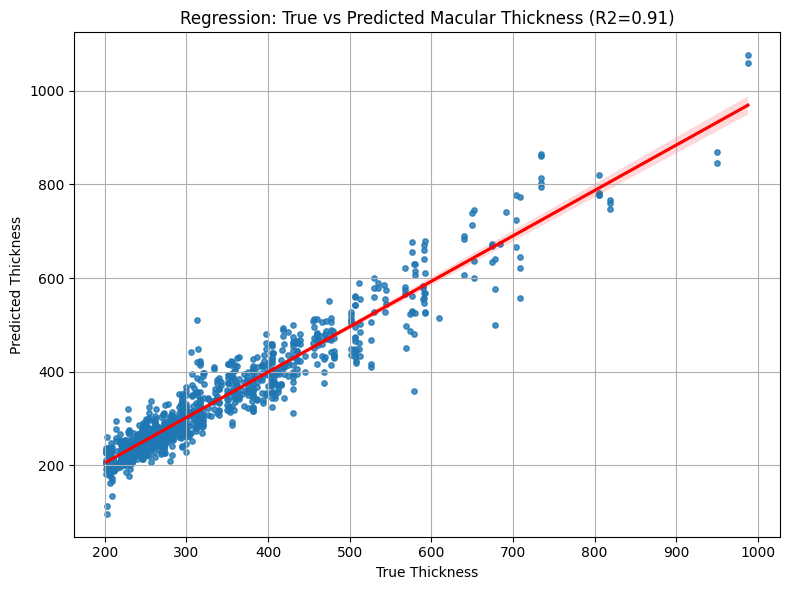

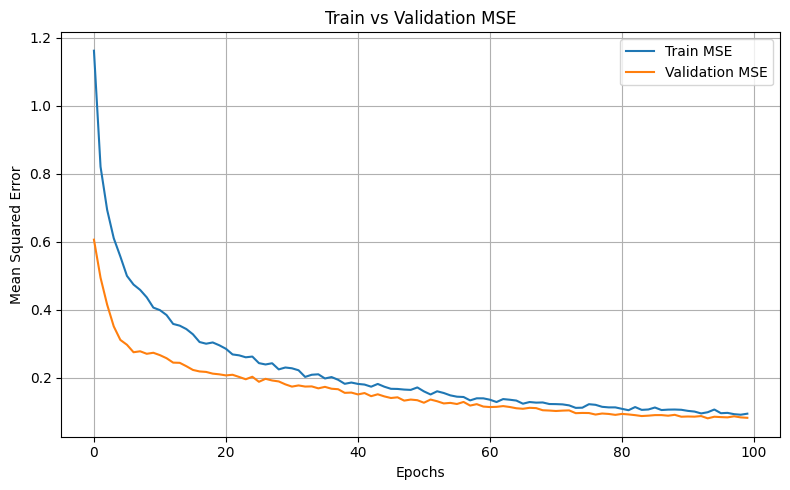

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = efficientnet_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= 300 else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= 300 else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= 300 else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build Model ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Improved Early Stopping ---
checkpoint_path = '/content/best_efficientnet_model.keras'
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=20,
        min_delta=1e-4,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        patience=10,
        factor=0.5,
        min_lr=1e-6,
        verbose=1
    )
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. Classification Metrics for DME ---
dme_pred = (y_pred >= 300).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. "
          f"Classification metrics undefined.")
else:
    acc = accuracy_score(y_dme_test, dme_pred)
    prec = precision_score(y_dme_test, dme_pred)
    rec = recall_score(y_dme_test, dme_pred)
    f1 = f1_score(y_dme_test, dme_pred)

    print("\nClassification Metrics for DME (Threshold=300):")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Precision = {prec:.4f}")
    print(f"  Recall    = {rec:.4f}")
    print(f"  F1 Score  = {f1:.4f}")

    print("\nDetailed Report:")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ResNet

✅ Loaded 320 images


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 4, 4,      │ 23,587,712 │ input_layer_6[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2048)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 2054)      │          0 │ dropout_2[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    263,040 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      8,256 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,867,265 (91.05 MB)

 Trainable params: 275,457 (1.05 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.4911 - mse: 1.4911
Epoch 1: val_loss improved from inf to 0.91200, saving model to /content/best_fundusnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - loss: 1.4889 - mse: 1.4889 - val_loss: 0.9120 - val_mse: 0.9120 - learning_rate: 1.0000e-04
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8639 - mse: 0.8639
Epoch 2: val_loss improved from 0.91200 to 0.74169, saving model to /content/best_fundusnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.8635 - mse: 0.8635 - val_loss: 0.7417 - val_mse: 0.7417 - learning_rate: 1.0000e-04
Epoch 3/100
111/113 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6381 - mse: 0.6381
Epoch 3: val_loss improved from 0.74169 to 0.63591, saving model to /content/best_fundusnet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.6382 - mse: 0.6382 - val_loss: 0.6359 - val_mse: 0.6359 - learning_rate: 1.0000e-04
Epoch 4/100
111/113 ━━━━━━━━━━━━━

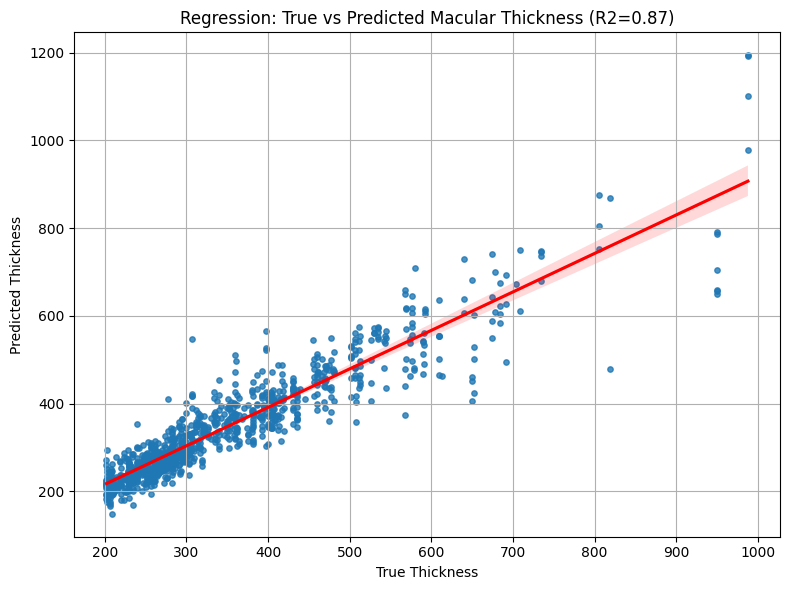

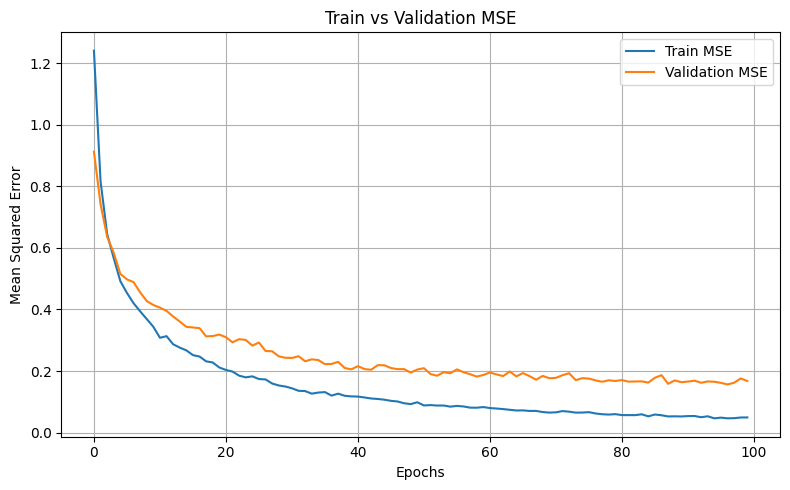

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300  # Updated threshold

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = resnet_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= DME_THRESHOLD else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= DME_THRESHOLD else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build FundusNet Model ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = ResNet50(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Callbacks ---
checkpoint_path = '/content/best_fundusnet_model.keras'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. DME Classification Report ---
dme_pred = (y_pred >= DME_THRESHOLD).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. Report is undefined.")
else:
    print("\n📊 Classification Report for DME (Threshold=300):")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


DenseNet121

✅ Loaded 320 images
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ densenet121         │ (None, 4, 4,      │  7,037,504 │ input_layer_9[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ densenet121[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 1030)      │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │    131,968 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      8,256 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,181,889 (27.40 MB)

 Trainable params: 142,337 (556.00 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 1.3823 - mse: 1.3823
Epoch 1: val_loss improved from inf to 0.70856, saving model to /content/best_fundusnet_densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 71s 370ms/step - loss: 1.3796 - mse: 1.3796 - val_loss: 0.7086 - val_mse: 0.7086 - learning_rate: 1.0000e-04
Epoch 2/100
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7311 - mse: 0.7311
Epoch 2: val_loss improved from 0.70856 to 0.54648, saving model to /content/best_fundusnet_densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.7312 - mse: 0.7312 - val_loss: 0.5465 - val_mse: 0.5465 - learning_rate: 1.0000e-04
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6241 - mse: 0.6241
Epoch 3: val_loss improved from 0.54648 to 0.47988, saving model to /content/best_fundusnet_densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.6240 - mse: 0.6240 - val_loss: 0.4799 - val_mse: 0.4799 - learning_rate: 1.0000e

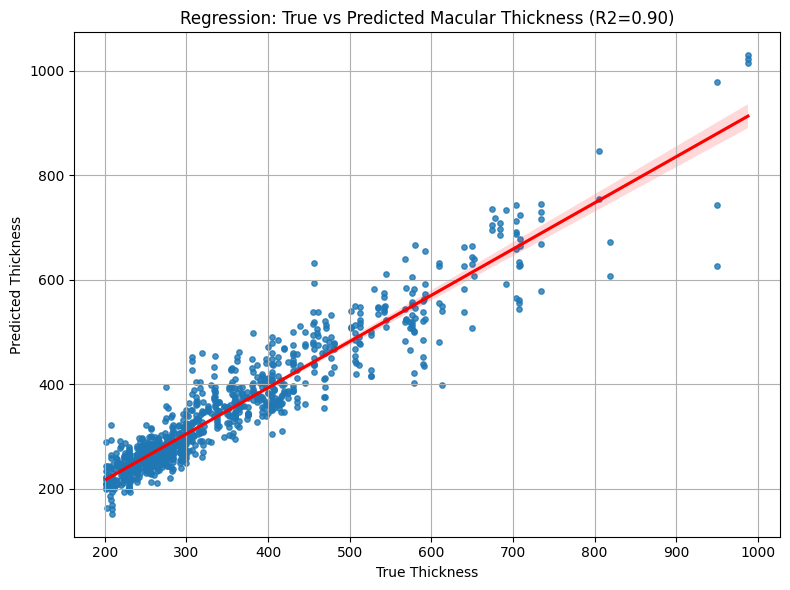

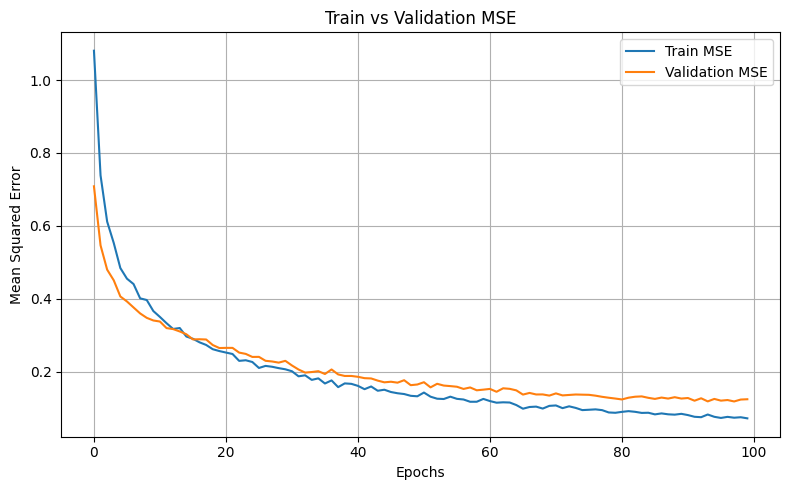

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300  # Threshold for DME

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = densenet_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= DME_THRESHOLD else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= DME_THRESHOLD else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build FundusNet Model with DenseNet121 ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Callbacks ---
checkpoint_path = '/content/best_fundusnet_densenet121_model.keras'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. DME Classification Report ---
dme_pred = (y_pred >= DME_THRESHOLD).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. Report is undefined.")
else:
    print("\n📊 Classification Report for DME (Threshold=300):")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


InceptionV3

✅ Loaded 320 images
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 2, 2,      │ 21,802,784 │ input_layer_12[0… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ inception_v3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2048)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 2054)      │          0 │ dropout_4[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │    263,040 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,082,337 (84.24 MB)

 Trainable params: 275,457 (1.05 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.4901 - mse: 1.4901
Epoch 1: val_loss improved from inf to 0.88523, saving model to /content/best_fundusnet_inceptionv3_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - loss: 1.4884 - mse: 1.4884 - val_loss: 0.8852 - val_mse: 0.8852 - learning_rate: 1.0000e-04
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8704 - mse: 0.8704
Epoch 2: val_loss improved from 0.88523 to 0.64305, saving model to /content/best_fundusnet_inceptionv3_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.8705 - mse: 0.8705 - val_loss: 0.6430 - val_mse: 0.6430 - learning_rate: 1.0000e-04
Epoch 3/100
111/113 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7643 - mse: 0.7643
Epoch 3: val_loss improved from 0.64305 to 0.60681, saving model to /content/best_fundusnet_inceptionv3_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.7631 - mse: 0.7631 - val_loss: 0.6068 - val_mse: 0.6068 - learning_rate: 1.0000e-

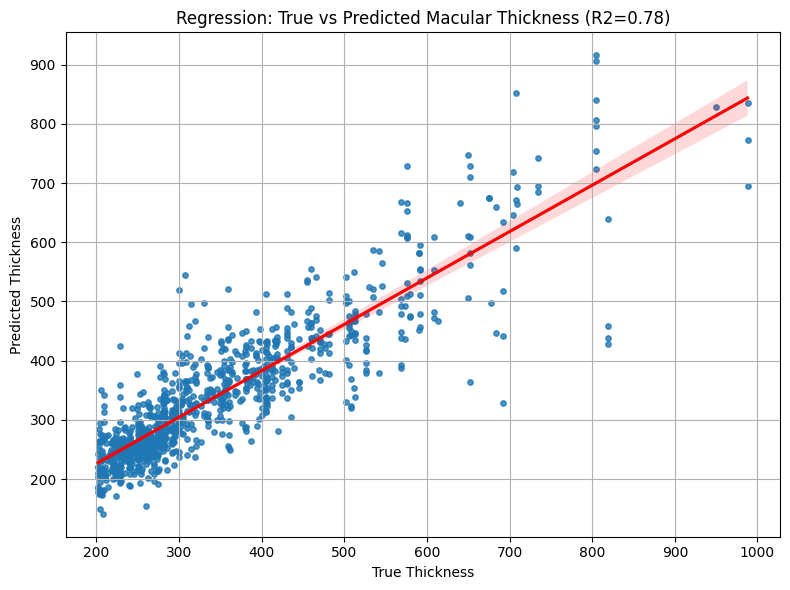

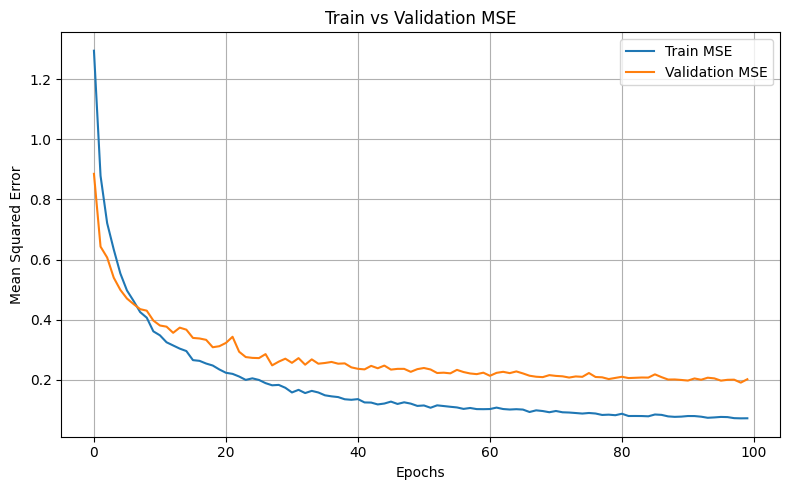

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300  # Threshold for DME

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = inception_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= DME_THRESHOLD else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= DME_THRESHOLD else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build FundusNet Model with InceptionV3 ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = InceptionV3(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Callbacks ---
checkpoint_path = '/content/best_fundusnet_inceptionv3_model.keras'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. DME Classification Report ---
dme_pred = (y_pred >= DME_THRESHOLD).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. Report is undefined.")
else:
    print("\n📊 Classification Report for DME (Threshold=300):")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Xception

✅ Loaded 320 images
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ xception            │ (None, 4, 4,      │ 20,861,480 │ input_layer[0][0] │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ xception[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2054)      │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    263,040 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,141,033 (80.65 MB)

 Trainable params: 275,457 (1.05 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 1.3736 - mse: 1.3736
Epoch 1: val_loss improved from inf to 0.82255, saving model to /content/best_fundusnet_xception_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - loss: 1.3720 - mse: 1.3720 - val_loss: 0.8225 - val_mse: 0.8225 - learning_rate: 1.0000e-04
Epoch 2/100
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.8488 - mse: 0.8488
Epoch 2: val_loss improved from 0.82255 to 0.66103, saving model to /content/best_fundusnet_xception_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.8483 - mse: 0.8483 - val_loss: 0.6610 - val_mse: 0.6610 - learning_rate: 1.0000e-04
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6837 - mse: 0.6837
Epoch 3: val_loss improved from 0.66103 to 0.55730, saving model to /content/best_fundusnet_xception_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.6836 - mse: 0.6836 - val_loss: 0.5573 - val_mse: 0.5573 - learning_rate: 1.0000e-04
Epoch

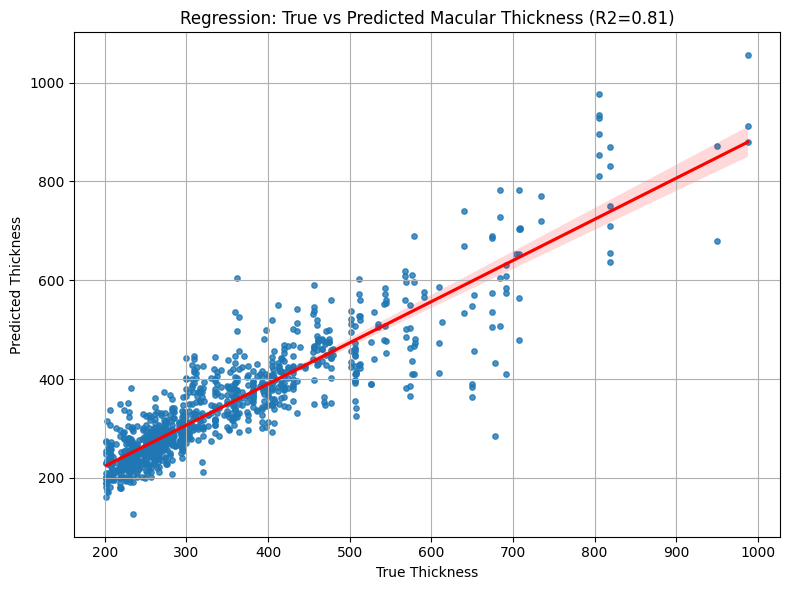

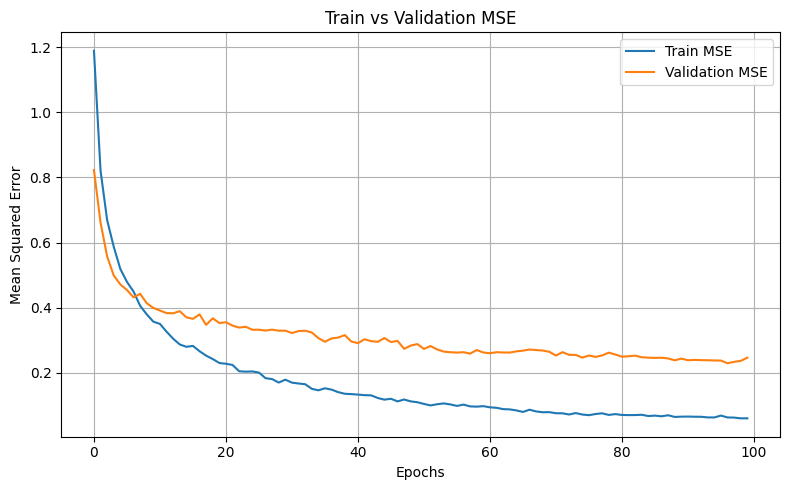

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300  # Threshold for DME

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = xception_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= DME_THRESHOLD else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= DME_THRESHOLD else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build FundusNet Model with Xception ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = Xception(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Callbacks ---
checkpoint_path = '/content/best_fundusnet_xception_model.keras'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. DME Classification Report ---
dme_pred = (y_pred >= DME_THRESHOLD).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. Report is undefined.")
else:
    print("\n📊 Classification Report for DME (Threshold=300):")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MobileNet

✅ Loaded 320 images
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenet_1.00_128  │ (None, 4, 4,      │  3,228,864 │ input_layer_3[0]… │
│ (Functional)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1024)      │          0 │ mobilenet_1.00_1… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1030)      │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │    131,968 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,373,249 (12.87 MB)

 Trainable params: 142,337 (556.00 KB)

 Non-trainable params: 3,230,912 (12.32 MB)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 1.9183 - mse: 1.9183
Epoch 1: val_loss improved from inf to 0.95277, saving model to /content/best_fundusnet_mobilenet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - loss: 1.9143 - mse: 1.9143 - val_loss: 0.9528 - val_mse: 0.9528 - learning_rate: 1.0000e-04
Epoch 2/100
111/113 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9221 - mse: 0.9221
Epoch 2: val_loss improved from 0.95277 to 0.72182, saving model to /content/best_fundusnet_mobilenet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.9216 - mse: 0.9216 - val_loss: 0.7218 - val_mse: 0.7218 - learning_rate: 1.0000e-04
Epoch 3/100
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8031 - mse: 0.8031
Epoch 3: val_loss improved from 0.72182 to 0.62063, saving model to /content/best_fundusnet_mobilenet_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.8026 - mse: 0.8026 - val_loss: 0.6206 - val_mse: 0.6206 - learning_rate: 1.0000e-04
Epo

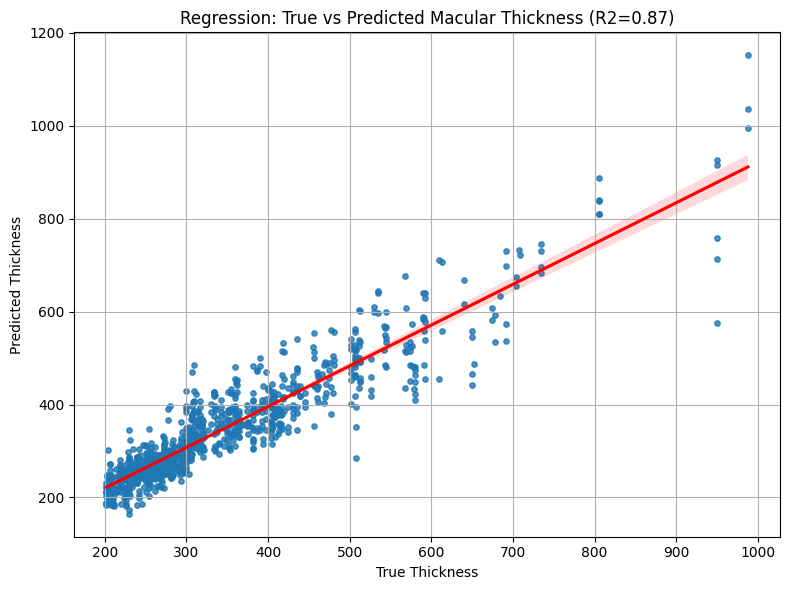

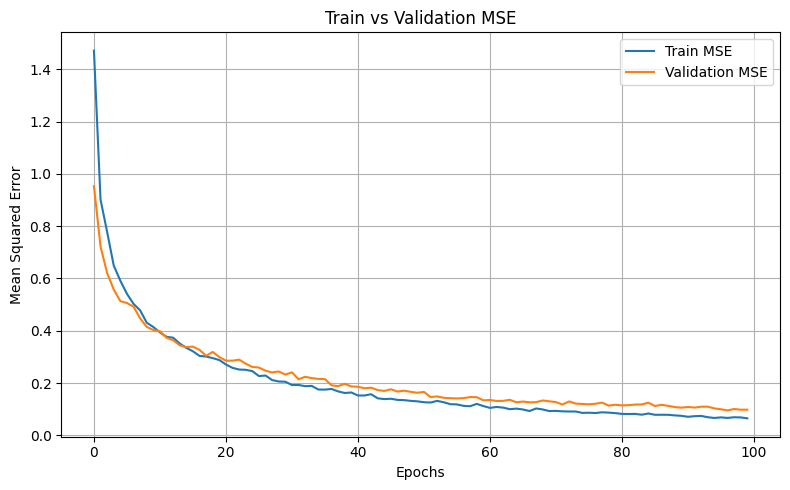

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300  # Threshold for DME

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Could not read image: {path}")
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = mobilenet_preprocess(img.astype(np.float32))
        return img
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

# --- DR Stage Mapping ---
dr_stage_map = {
    'No DR': 0,
    'Mild NPDR': 1,
    'Moderate NPDR': 2,
    'Severe NPDR': 3,
    'PDR': 4
}

images, tabular, labels, dme_labels = [], [], [], []

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([
            row['VA'],
            row['DiabetesDuration'],
            1 if row['Neovascularization'] == 'Yes' else 0,
            row['HbA1c'],
            dr_stage_map.get(row['Stage of DR'], -1),
            1 if row['Presence of DME'] == 'Yes' else 0
        ])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness'] >= DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y_raw = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Balanced Augmentation to 5000 ---
target_per_class = 2500

X_img_dme = X_img[y_dme == 1]
X_tab_dme = X_tab[y_dme == 1]
y_dme_dme = y_raw[y_dme == 1]

X_img_nodme = X_img[y_dme == 0]
X_tab_nodme = X_tab[y_dme == 0]
y_dme_nodme = y_raw[y_dme == 0]

def augment_to_target(X_img_cls, X_tab_cls, y_cls, target_count):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True
    )

    aug_imgs, aug_tabs, aug_labs, aug_dmes = list(X_img_cls), list(X_tab_cls), list(y_cls), [1 if y >= DME_THRESHOLD else 0 for y in y_cls]
    gen = datagen.flow(X_img_cls, y_cls, batch_size=32, shuffle=True)
    count = len(X_img_cls)

    while count < target_count:
        x_batch, y_batch = next(gen)
        take = min(len(x_batch), target_count - count)
        aug_imgs.extend(x_batch[:take])
        aug_tabs.extend(X_tab_cls[:take])
        aug_labs.extend(y_batch[:take])
        aug_dmes.extend([1 if y >= DME_THRESHOLD else 0 for y in y_batch[:take]])
        count += take

    return np.array(aug_imgs), np.array(aug_tabs), np.array(aug_labs), np.array(aug_dmes)

X_img_dme_aug, X_tab_dme_aug, y_dme_aug, y_dme_bin_aug = augment_to_target(X_img_dme, X_tab_dme, y_dme_dme, target_per_class)
X_img_nodme_aug, X_tab_nodme_aug, y_nodme_aug, y_nodme_bin_aug = augment_to_target(X_img_nodme, X_tab_nodme, y_dme_nodme, target_per_class)

X_img_aug = np.concatenate([X_img_dme_aug, X_img_nodme_aug], axis=0)
X_tab_aug = np.concatenate([X_tab_dme_aug, X_tab_nodme_aug], axis=0)
y_all = np.concatenate([y_dme_aug, y_nodme_aug], axis=0)
y_dme_all = np.concatenate([y_dme_bin_aug, y_nodme_bin_aug], axis=0)

# --- 4. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab_aug)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_all.reshape(-1, 1)).flatten()

# --- 5. Split ---
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_img_aug, y_dme_all):
    X_img_train, X_img_test = X_img_aug[train_idx], X_img_aug[test_idx]
    X_tab_train, X_tab_test = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    y_dme_train, y_dme_test = y_dme_all[train_idx], y_dme_all[test_idx]

# --- 6. Build FundusNet Model with MobileNet ---
def build_model(img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)

    base = MobileNet(include_top=False, weights='imagenet', input_shape=img_shape)
    base.trainable = False

    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    merged = concatenate([x, tab_input])
    d1 = Dense(128, activation='relu')(merged)
    d2 = Dense(64, activation='relu')(d1)
    output = Dense(1)(d2)

    return Model(inputs=[img_input, tab_input], outputs=output)

model = build_model((IMG_SIZE, IMG_SIZE, 3), (X_tab.shape[1],))
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
model.summary()

# --- 7. Callbacks ---
checkpoint_path = '/content/best_fundusnet_mobilenet_model.keras'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=1)
]

# --- 8. Train ---
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9. Evaluation ---
model.load_weights(checkpoint_path)
y_pred_scaled = model.predict([X_img_test, X_tab_test])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_true, y_pred)
print(f"Test R^2 Score: {r2:.4f}")

# --- 10. DME Classification Report ---
dme_pred = (y_pred >= DME_THRESHOLD).astype(int)
unique_classes = np.unique(y_dme_test)

if len(unique_classes) < 2:
    print(f"⚠️ Only one class ({unique_classes[0]}) present in test labels. Report is undefined.")
else:
    print("\n📊 Classification Report for DME (Threshold=300):")
    print(classification_report(y_dme_test, dme_pred, target_names=['No DME', 'DME']))

# --- 11. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.regplot(x=y_true.flatten(), y=y_pred.flatten(), scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.xlabel('True Thickness')
plt.ylabel('Predicted Thickness')
plt.title(f'Regression: True vs Predicted Macular Thickness (R2={r2:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 12. MSE Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Loaded 320 images

=== Training EfficientNetB0 ===
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step

=== Training ResNet50 ===
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step

=== Training DenseNet121 ===
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step

=== Training InceptionV3 ===
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step

=== Training Xception ===
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step

=== Training MobileNet ===
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


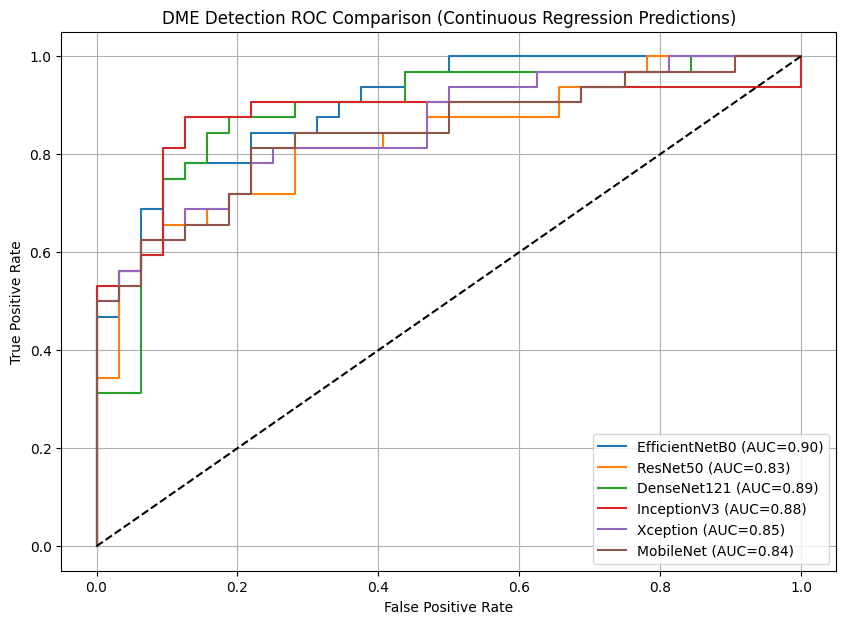


=== ROC-AUC Results ===
EfficientNetB0: ROC AUC = 0.9043
ResNet50: ROC AUC = 0.8320
DenseNet121: ROC AUC = 0.8857
InceptionV3: ROC AUC = 0.8779
Xception: ROC AUC = 0.8545
MobileNet: ROC AUC = 0.8438


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import (
    EfficientNetB0, ResNet50, DenseNet121, InceptionV3, Xception, MobileNet
)
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

# --- CONFIG ---
IMG_SIZE = 128
CSV_PATH = '/content/dme_patient_data.csv'
IMAGE_DIR = '/content/drive/MyDrive/Sabitha Eye Hospital and AIMS data/DME FUNDUS IMAGES AIMS_SABITHA HOS'
DME_THRESHOLD = 300
MODELS = ["EfficientNetB0","ResNet50","DenseNet121","InceptionV3","Xception","MobileNet"]

# --- 1. Load CSV ---
df = pd.read_csv(CSV_PATH)
df['filename'] = df['Patient'].astype(str) + '.png'

def resolve_image_path(pid):
    for ext in ['.png', '.jpg', '.jpeg']:
        path = os.path.join(IMAGE_DIR, pid + ext)
        if os.path.isfile(path):
            return path
    return None

df['filepath'] = df['Patient'].apply(resolve_image_path)
df = df.dropna(subset=['filepath'])

# --- 2. Preprocess Images ---
def preprocess_image(path):
    try:
        img = cv2.imread(path)
        if img is None:
            return None
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = efficientnet_preprocess(img.astype(np.float32))
        return img
    except:
        return None

images, tabular, labels, dme_labels = [], [], [], []

dr_stage_map = {'No DR':0,'Mild NPDR':1,'Moderate NPDR':2,'Severe NPDR':3,'PDR':4}

for _, row in df.iterrows():
    img = preprocess_image(row['filepath'])
    if img is not None:
        images.append(img)
        tabular.append([row['VA'], row['DiabetesDuration'], 1 if row['Neovascularization']=='Yes' else 0,
                        row['HbA1c'], dr_stage_map.get(row['Stage of DR'],-1), 1 if row['Presence of DME']=='Yes' else 0])
        labels.append(row['Macular Thickness'])
        dme_labels.append(1 if row['Macular Thickness']>=DME_THRESHOLD else 0)

X_img = np.array(images)
X_tab = np.array(tabular)
y = np.array(labels)
y_dme = np.array(dme_labels)

print(f"✅ Loaded {len(X_img)} images")

# --- 3. Normalize ---
scaler_tab = StandardScaler()
X_tab_scaled = scaler_tab.fit_transform(X_tab)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).flatten()

# --- 4. Train/Test Split ---
X_img_train, X_img_test, X_tab_train, X_tab_test, y_train, y_test, y_dme_train, y_dme_test = train_test_split(
    X_img, X_tab_scaled, y_scaled, y_dme, test_size=0.2, random_state=42
)

# --- 5. Model Builder ---
def build_model(model_name, img_shape, tab_shape):
    img_input = Input(shape=img_shape)
    tab_input = Input(shape=tab_shape)
    if model_name=="EfficientNetB0": base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=img_shape)
    elif model_name=="ResNet50": base = ResNet50(include_top=False, weights='imagenet', input_shape=img_shape)
    elif model_name=="DenseNet121": base = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape)
    elif model_name=="InceptionV3": base = InceptionV3(include_top=False, weights='imagenet', input_shape=img_shape)
    elif model_name=="Xception": base = Xception(include_top=False, weights='imagenet', input_shape=img_shape)
    elif model_name=="MobileNet": base = MobileNet(include_top=False, weights='imagenet', input_shape=img_shape)
    else: raise ValueError("Unknown model")

    base.trainable=False
    x = base(img_input)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    merged = concatenate([x, tab_input])
    x = Dense(128, activation='relu')(merged)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)
    return Model([img_input, tab_input], output)

# --- 6. Train & Evaluate All Models ---
results={}
plt.figure(figsize=(10,7))

for model_name in MODELS:
    print(f"\n=== Training {model_name} ===")
    model = build_model(model_name, (IMG_SIZE,IMG_SIZE,3), (X_tab.shape[1],))
    model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mse'])
    checkpoint_path=f'/content/best_{model_name}.keras'

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0),
        ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-6, verbose=0)
    ]

    model.fit([X_img_train,X_tab_train], y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
    model.load_weights(checkpoint_path)

    y_pred = scaler_y.inverse_transform(model.predict([X_img_test,X_tab_test]))

    roc_auc = roc_auc_score(y_dme_test, y_pred)
    fpr, tpr, _ = roc_curve(y_dme_test, y_pred)
    results[model_name] = {"roc_auc":roc_auc}

    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")

# --- 7. ROC Plot ---
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DME Detection ROC Comparison (Continuous Regression Predictions)")
plt.legend()
plt.grid(True)
plt.show()

# --- 8. Print ROC AUC Table ---
print("\n=== ROC-AUC Results ===")
for model_name, metric in results.items():
    print(f"{model_name}: ROC AUC = {metric['roc_auc']:.4f}")
